In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [116]:
df = pd.read_csv('test.csv', na_values='?')
df.drop(columns=['Unnamed: 0'], inplace=True)
df = df.dropna()
## #data preprocessing 
#convert categorical to numerical Gender,Customer Type, Type of Travel,Class
#Feature engineering

#Total delay rather than 
df['Total Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

#Turns delay into a categorical feature 
def bucket_total_delay(minutes):
    if minutes <= 15:
        return 'On Time'
    elif minutes <= 60:
        return 'Small Delay'
    else:
        return 'Big Delay'

# Apply the function to create a new feature
df['Delay Category'] = df['Total Delay'].apply(bucket_total_delay)

def bucket_rating(x):
    if x <= 2:
        return 'Low'
    elif x == 3:
        return 'Medium'
    else:
        return 'High'

rating_columns = [ 'Inflight wifi service','Food and drink', 'Seat comfort',
                  'Inflight entertainment', 'On-board service', 'Leg room service',
                  'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

for col in rating_columns:
    df[col] = df[col].apply(bucket_rating)

print(df.describe())
df.head(10)

                  id           Age  Flight Distance  \
count   25893.000000  25893.000000     25893.000000   
mean    65021.974858     39.621983      1193.753254   
std     37606.098635     15.134224       998.626779   
min        17.000000      7.000000        31.000000   
25%     32209.000000     27.000000       414.000000   
50%     65344.000000     40.000000       849.000000   
75%     97623.000000     51.000000      1744.000000   
max    129877.000000     85.000000      4983.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       25893.000000            25893.000000   
mean                            3.046422                2.755996   
std                             1.532971                1.412552   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                         

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Category
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,High,4,3,...,High,High,Low,5,High,50,44.0,satisfied,94.0,Big Delay
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,Low,1,3,...,High,High,Medium,4,High,0,0.0,satisfied,0.0,On Time
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,Low,0,2,...,Low,Medium,Low,2,Low,0,0.0,neutral or dissatisfied,0.0,On Time
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,Low,0,0,...,Low,Low,Medium,1,High,0,6.0,satisfied,6.0,On Time
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,Low,3,4,...,Low,Low,High,2,High,0,20.0,satisfied,20.0,Small Delay
5,39177,Male,Loyal Customer,16,Business travel,Eco,311,Medium,3,3,...,Medium,Low,Low,2,High,0,0.0,satisfied,0.0,On Time
6,79433,Female,Loyal Customer,77,Business travel,Business,3987,High,5,5,...,High,High,High,5,Medium,0,0.0,satisfied,0.0,On Time
7,97286,Female,Loyal Customer,43,Business travel,Business,2556,Low,2,2,...,High,High,High,4,Medium,77,65.0,satisfied,142.0,Big Delay
8,27508,Male,Loyal Customer,47,Business travel,Eco,556,High,2,2,...,Low,High,Medium,3,High,1,0.0,satisfied,1.0,On Time
9,62482,Female,Loyal Customer,46,Business travel,Business,1744,Low,2,2,...,High,High,High,4,High,28,14.0,satisfied,42.0,Small Delay


In [117]:
attr = df.drop(columns=['satisfaction', 'id'])
target = df['satisfaction']
attr.head()
#target.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Total Delay,Delay Category
0,Female,Loyal Customer,52,Business travel,Eco,160,High,4,3,4,...,High,High,High,Low,5,High,50,44.0,94.0,Big Delay
1,Female,Loyal Customer,36,Business travel,Business,2863,Low,1,3,1,...,High,High,High,Medium,4,High,0,0.0,0.0,On Time
2,Male,disloyal Customer,20,Business travel,Eco,192,Low,0,2,4,...,High,Low,Medium,Low,2,Low,0,0.0,0.0,On Time
3,Male,Loyal Customer,44,Business travel,Business,3377,Low,0,0,2,...,Low,Low,Low,Medium,1,High,0,6.0,6.0,On Time
4,Female,Loyal Customer,49,Business travel,Eco,1182,Low,3,4,3,...,Low,Low,Low,High,2,High,0,20.0,20.0,Small Delay


In [118]:
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=5)
categorical_columns = [
    'Gender',
    'Customer Type',
    'Type of Travel',
    'Class',
    'Inflight wifi service',
    'Food and drink',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Cleanliness',
    'Online boarding',
    'Delay Category'
]
# Create preprocessor for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns) ])

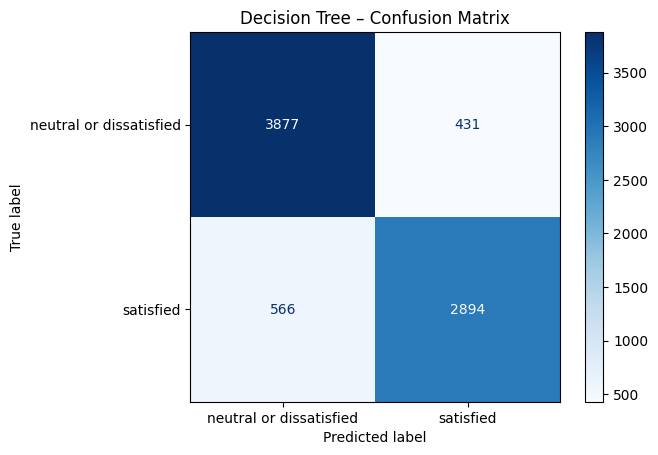

                         precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.90      0.89      4308
              satisfied       0.87      0.84      0.85      3460

               accuracy                           0.87      7768
              macro avg       0.87      0.87      0.87      7768
           weighted avg       0.87      0.87      0.87      7768



In [119]:
from sklearn.tree import DecisionTreeClassifier
# Create CART model
cart = DecisionTreeClassifier()
# Create a pipeline with preprocessing and model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', cart)])
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix
cm = confusion_matrix(target_test,target_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['neutral or dissatisfied', 'satisfied'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Decision Tree – Confusion Matrix')
plt.grid(False)
plt.show()
print(classification_report(target_test,target_pred))

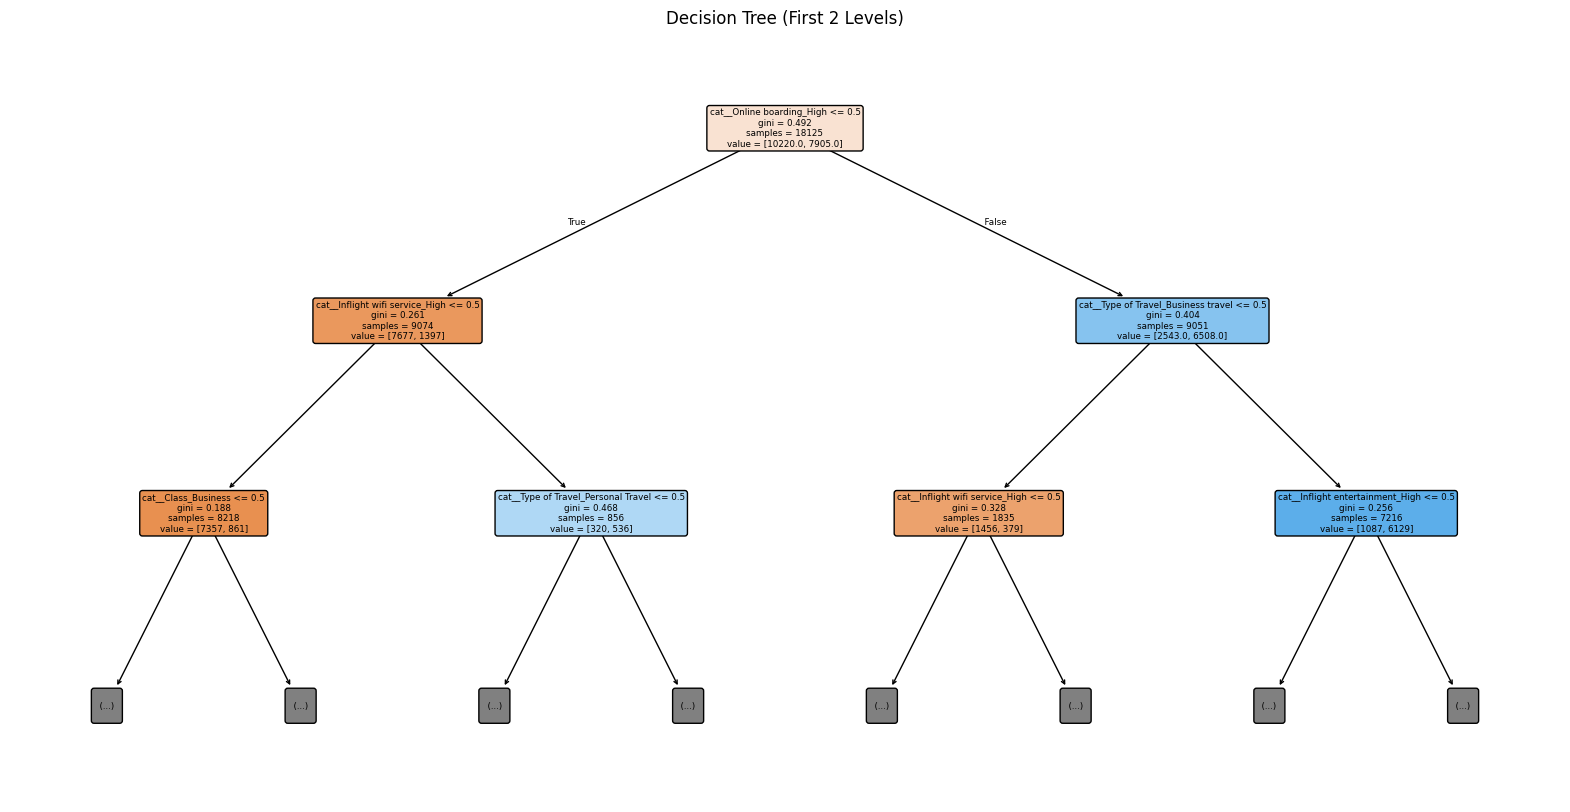

In [120]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model.named_steps["classifier"], filled=True, feature_names=model[:-1].get_feature_names_out(), rounded=True, max_depth=2)
plt.title("Decision Tree (First 2 Levels)")
plt.show()

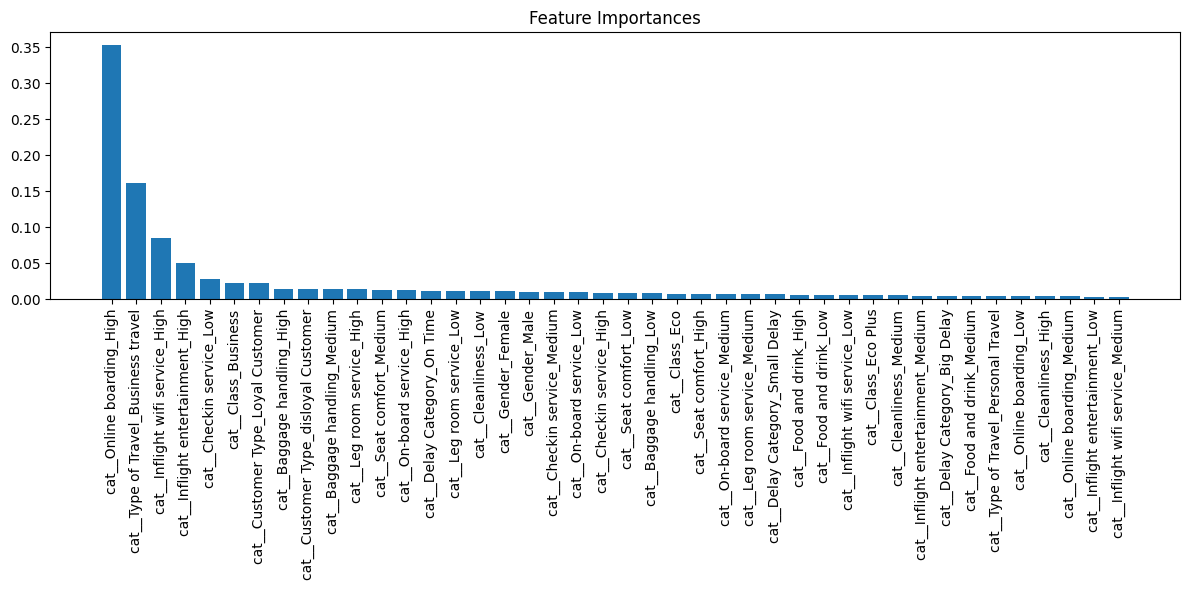

In [121]:
import numpy as np

importances = model.named_steps["classifier"].feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), model[:-1].get_feature_names_out()[indices], rotation=90)
plt.tight_layout()
plt.show()

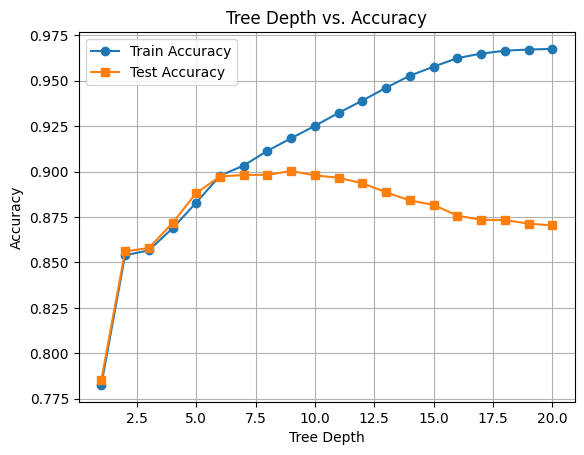

In [122]:
from sklearn.metrics import accuracy_score

depths = range(1, 21)
train_acc = []
test_acc = []

for d in depths:
    cart = DecisionTreeClassifier(max_depth=d, random_state=5)
    # Create a pipeline with preprocessing and model
    model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', cart)])
    model.fit(attr_train, target_train)
    train_acc.append(model.score(attr_train, target_train))
    test_acc.append(model.score(attr_test, target_test))

plt.plot(depths, train_acc, label='Train Accuracy', marker='o')
plt.plot(depths, test_acc, label='Test Accuracy', marker='s')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Tree Depth vs. Accuracy")
plt.legend()
plt.grid(True)
plt.show()